In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Wind.Results import DBResults
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal
import matplotlib.pyplot as plt

# Fitting KNNdir reg

In [4]:
query={'experiment':'knndir'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.results_dataframe_retrieve(query, arch=['n_neighbors'], data=['lag','vars'])

In [5]:
a=results.exp_df.groupby(['site','n_neighbors','lag','vars'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
len(a)

4200

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f14bf3355f8>,
      dtype=object)

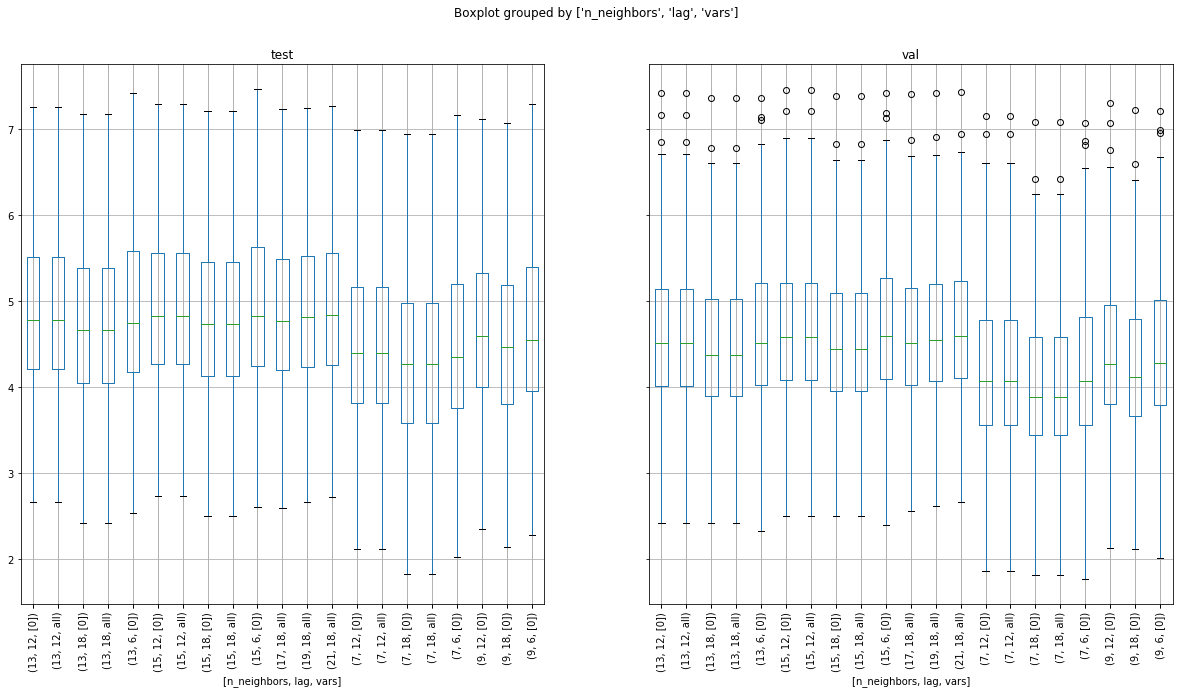

In [6]:
a.boxplot(by=['n_neighbors','lag', 'vars'],figsize=(20,10), rot=90)

In [12]:
b =a.groupby(by=['n_neighbors','lag','vars'],as_index=False).agg({'test':['mean','count','std'], 'val':'mean'})
b.style.highlight_max()


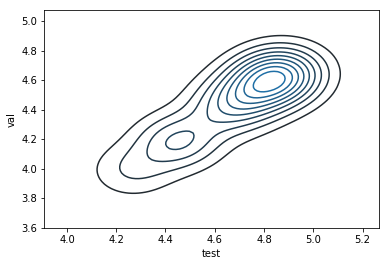

In [16]:
sns.kdeplot(b['test'],b['val'])

In [18]:
a.groupby(by=['n_neighbors','lag','vars'],as_index=False).count()

,n_neighbors,lag,vars,test,val
0,13,12,"[0, 1, 2, 3, 4, 5, 6]",200,200
1,13,12,[0],200,200
2,13,18,"[0, 1, 2, 3, 4, 5, 6]",200,200
3,13,18,[0],200,200
4,13,6,[0],200,200
5,15,12,"[0, 1, 2, 3, 4, 5, 6]",200,200
6,15,12,[0],200,200
7,15,18,"[0, 1, 2, 3, 4, 5, 6]",200,200
8,15,18,[0],200,200
9,15,6,[0],200,200
